In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import label
from skimage.measure import regionprops

In [2]:
# Creation of a funtion that read the data
def data_lecture(file):
    data = np.rot90(np.genfromtxt(file), 1)
    # extraction the mean value of the array of pixel for the dead pixels
    mean_value = np.mean(data)
    # Now, we give the mean value to the dead pixels
    data[np.where(data == 0)] = mean_value
    
    return data

In [3]:
# Creation of a chart funtion
def chart(title, data, save):
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.imshow(data, cmap="bone")
    print(data.shape)
    plt.savefig(save)

(256, 256)


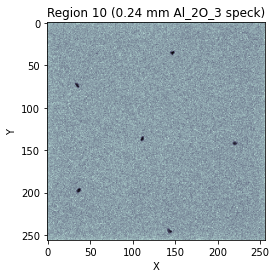

In [4]:
# Region 10 reading
data_2 = data_lecture("Alum_10.txt")

chart("Region 10 (0.24 mm Al_2O_3 speck)", data_2, "Region 10 without FF")

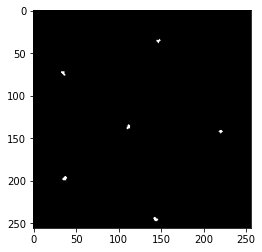

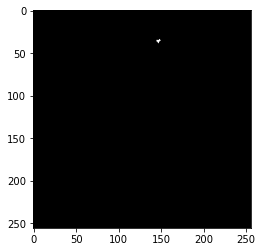

spot 1: X = 146.85 pixels, Y = 220.23 pixels for 0,0 in the bottom left corner
spot 1: X = 3485.08 μm, Y = 5226.71 μm


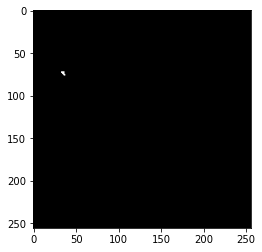

spot 2: X = 35.12 pixels, Y = 182.31 pixels for 0,0 in the bottom left corner
spot 2: X = 833.62 μm, Y = 4326.80 μm


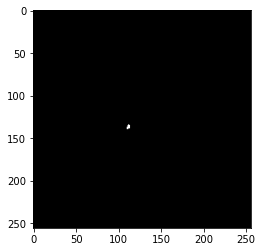

spot 3: X = 111.59 pixels, Y = 119.24 pixels for 0,0 in the bottom left corner
spot 3: X = 2648.31 μm, Y = 2829.80 μm


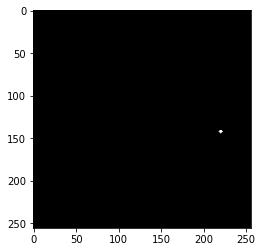

spot 4: X = 220.00 pixels, Y = 113.83 pixels for 0,0 in the bottom left corner
spot 4: X = 5221.23 μm, Y = 2701.59 μm


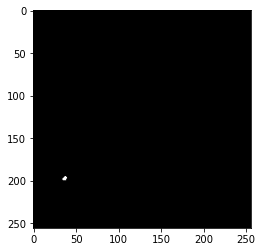

spot 5: X = 36.80 pixels, Y = 58.75 pixels for 0,0 in the bottom left corner
spot 5: X = 873.37 μm, Y = 1394.31 μm


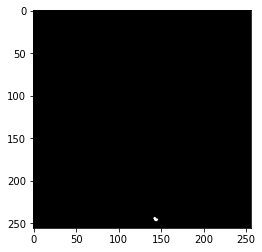

spot 6: X = 143.53 pixels, Y = 10.84 pixels for 0,0 in the bottom left corner
spot 6: X = 3406.29 μm, Y = 257.31 μm


In [5]:
prueba = data_2 < 2300 # treshold: otsu?
plt.imshow(prueba, cmap='gray')

prueba1 = label(prueba)
altura_imagen = prueba1.shape[0]
props = regionprops(prueba1)

distance_fd = 73 # cm
distance_fo = 63 # cm
magnification = distance_fd / distance_fo


for prop in props:
    x = prop.centroid[1]  
    y = altura_imagen - prop.centroid[0]

    #yy = prop.centroid[0]

    distance_x = (x*110/4) / magnification # 4 pixels = 110 μm
    distance_y = (y*110/4) / magnification
    #distance_yy = (yy*110/4) / magnification
    
    plt.figure()
    plt.imshow(prueba1 == prop.label, cmap='gray')
    plt.show()
    
    print(f"spot {prop.label}: X = {x:.2f} pixels, Y = {y:.2f} pixels for 0,0 in the bottom left corner")
    print(f"spot {prop.label}: X = {distance_x:.2f} μm, Y = {distance_y:.2f} μm")
    #print(f"spot {prop.label}: X = {x:.2f} pixels, Y = {yy:.2f} pixels for 0,0 in the top left corner")
    #print(f"spot {prop.label}: X = {distance_x:.2f} μm, Y = {distance_yy:.2f} μm")


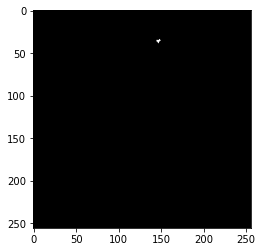

spot 1: X = 35.26 pixels, Y = 101.00 pixels for 0,0 on region 3
spot 1: X = 836.77 μm, Y = 2396.91 μm for 0,0 on region 3


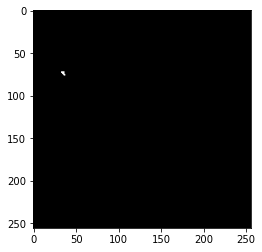

spot 2: X = -76.46 pixels, Y = 63.08 pixels for 0,0 on region 3
spot 2: X = -1814.69 μm, Y = 1497.00 μm for 0,0 on region 3


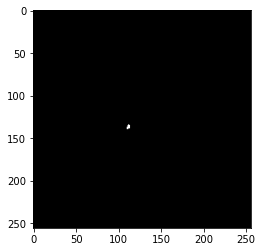

spot 3: X = 0.00 pixels, Y = 0.00 pixels for 0,0 on region 3
spot 3: X = 0.00 μm, Y = 0.00 μm for 0,0 on region 3


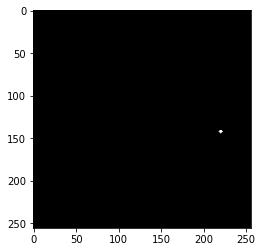

spot 4: X = 108.41 pixels, Y = -5.40 pixels for 0,0 on region 3
spot 4: X = 2572.92 μm, Y = -128.20 μm for 0,0 on region 3


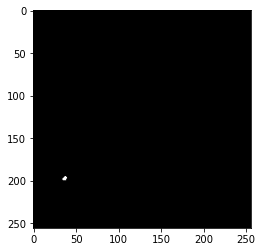

spot 5: X = -74.79 pixels, Y = -60.49 pixels for 0,0 on region 3
spot 5: X = -1774.94 μm, Y = -1435.49 μm for 0,0 on region 3


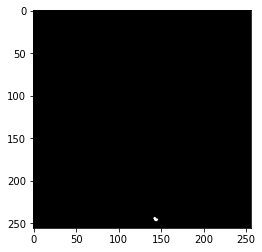

spot 6: X = 31.94 pixels, Y = -108.39 pixels for 0,0 on region 3
spot 6: X = 757.98 μm, Y = -2572.48 μm for 0,0 on region 3


In [6]:
#Tomando como 0,0 la mancha 3:

for prop in props:
    if prop.label == 3:
        ref_x = prop.centroid[1]
        ref_y = prop.centroid[0]  
        break

for prop in props:
    x = prop.centroid[1] - ref_x
    y = (altura_imagen - prop.centroid[0]) - (altura_imagen - ref_y)
    

    distance_x = (x*110/4) / magnification # 4 pixels = 110 μm
    distance_y = (y*110/4) / magnification

    plt.figure()
    plt.imshow(prueba1 == prop.label, cmap='gray')
    plt.show()
    
    print(f"spot {prop.label}: X = {x:.2f} pixels, Y = {y:.2f} pixels for 0,0 on region 3")
    print(f"spot {prop.label}: X = {distance_x:.2f} μm, Y = {distance_y:.2f} μm for 0,0 on region 3")
